<a href="https://colab.research.google.com/github/Sathwik-parimi-07/woc/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/woc drive/binary_classification_train.csv')

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          48000 non-null  int64  
 1   Feature_1   48000 non-null  float64
 2   Feature_2   48000 non-null  float64
 3   Feature_3   48000 non-null  float64
 4   Feature_4   48000 non-null  float64
 5   Feature_5   48000 non-null  float64
 6   Feature_6   48000 non-null  float64
 7   Feature_7   48000 non-null  float64
 8   Feature_8   48000 non-null  float64
 9   Feature_9   48000 non-null  float64
 10  Feature_10  48000 non-null  float64
 11  Feature_11  48000 non-null  float64
 12  Feature_12  48000 non-null  float64
 13  Feature_13  48000 non-null  float64
 14  Feature_14  48000 non-null  float64
 15  Feature_15  48000 non-null  float64
 16  Feature_16  48000 non-null  float64
 17  Feature_17  48000 non-null  float64
 18  Feature_18  48000 non-null  float64
 19  Feature_19  48000 non-nul

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
0,1,-36.963099,-15.014703,87.100435,101.523360,82.106571,-10.956180,0.592326,-51.919028,-90.650434,...,-81.183744,13.101921,18.051450,-40.606288,-39.697053,-13.870802,173.722987,-17.349169,-82.550844,0
1,2,-43.715674,18.847116,89.543406,-71.319314,35.597052,126.358570,-29.837495,-40.473764,-94.079238,...,-37.848260,7.457352,-77.420742,53.773718,-100.124294,9.870650,11.592519,-106.123605,-92.796421,1
2,3,-30.737550,-63.729643,106.081332,81.773948,112.769976,-12.425351,-29.913286,-41.771200,16.424511,...,-106.610289,5.930143,-30.177083,-138.969234,-56.054914,-12.790661,164.832498,-37.412902,-85.441150,0
3,4,-27.674757,-118.869495,135.605213,99.130189,50.947548,-63.704785,-7.353057,-58.140229,-80.209027,...,-149.056417,3.893419,-74.100869,-47.659832,-48.209817,-36.264323,59.001922,-59.064134,-78.538639,0
4,5,-28.654141,-77.746597,85.215365,50.374774,79.763207,-32.703048,-28.152031,-63.994794,-153.566789,...,-102.731465,11.160205,-13.395073,9.416237,2.649524,-43.578704,52.261888,-66.081738,-80.325110,0


In [ ]:
data2=data.drop(columns=['ID'],axis=1)

In [ ]:
x=data2.iloc[:,:-1].values
y=data2.iloc[:,-1].values

In [ ]:
#normalisation features
mean=np.mean(x,axis=0)
sd=np.std(x,axis=0)
x=(x-mean)/(sd+1e-6)
#no need since binary classification
'''mean_y=np.mean(y)
sd_y=np.std(y)
y=(y-mean_y)/(sd_y+1e-6)'''

'mean_y=np.mean(y)\nsd_y=np.std(y)\ny=(y-mean_y)/(sd_y+1e-6)'

In [ ]:
data.corr()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
ID,1.000000,-0.001364,-0.001825,0.000635,0.002485,-0.000545,-0.003801,-0.001912,0.005348,0.000071,...,0.003913,-0.001091,0.001379,-0.004594,0.005061,-0.001688,-0.001030,-0.003068,-0.000126,-0.004059
Feature_1,-0.001364,1.000000,0.005258,-0.007029,-0.005381,0.002107,0.004598,-0.006650,-0.002358,0.004643,...,-0.000025,-0.004455,-0.002276,0.009351,-0.000793,-0.002513,0.002663,0.008786,0.003519,0.006584
Feature_2,-0.001825,0.005258,1.000000,-0.004641,-0.001177,0.000310,0.002616,0.001629,0.005280,0.006427,...,0.007107,-0.001974,0.003059,-0.005178,0.002568,0.002186,-0.008748,-0.009744,-0.005497,-0.002026
Feature_3,0.000635,-0.007029,-0.004641,1.000000,0.004132,-0.001717,0.001147,-0.003639,0.006021,0.003897,...,-0.003363,-0.008882,-0.004480,0.002077,-0.002435,0.000522,-0.007265,-0.002071,-0.002281,0.002764
Feature_4,0.002485,-0.005381,-0.001177,0.004132,1.000000,-0.000382,0.026321,0.005815,-0.002495,0.012083,...,-0.002513,0.002140,0.097338,-0.583338,-0.319590,0.621745,-0.103562,-0.213026,0.001597,0.004680
Feature_5,-0.000545,0.002107,0.000310,-0.001717,-0.000382,1.000000,0.010566,0.001174,0.002438,-0.002248,...,0.001302,-0.002920,-0.001093,0.006319,-0.000573,0.004937,-0.002203,-0.002195,0.004288,0.007511
Feature_6,-0.003801,0.004598,0.002616,0.001147,0.026321,0.010566,1.000000,0.001967,-0.001125,-0.045430,...,-0.006656,0.000930,0.075364,0.278482,-0.274700,0.687681,-0.325669,-0.383695,-0.001421,0.753229
Feature_7,-0.001912,-0.006650,0.001629,-0.003639,0.005815,0.001174,0.001967,1.000000,-0.002869,0.004341,...,0.003006,-0.010072,-0.001547,-0.003083,-0.003489,0.004388,-0.004870,-0.004449,0.001659,0.005752
Feature_8,0.005348,-0.002358,0.005280,0.006021,-0.002495,0.002438,-0.001125,-0.002869,1.000000,0.004547,...,0.001789,0.001081,-0.003911,0.000115,0.001976,-0.003245,-0.003036,-0.004685,-0.009070,0.001296
Feature_9,0.000071,0.004643,0.006427,0.003897,0.012083,-0.002248,-0.045430,0.004341,0.004547,1.000000,...,0.003113,-0.006423,-0.065249,-0.230271,-0.099420,-0.029169,0.060779,0.138679,0.007091,-0.000570


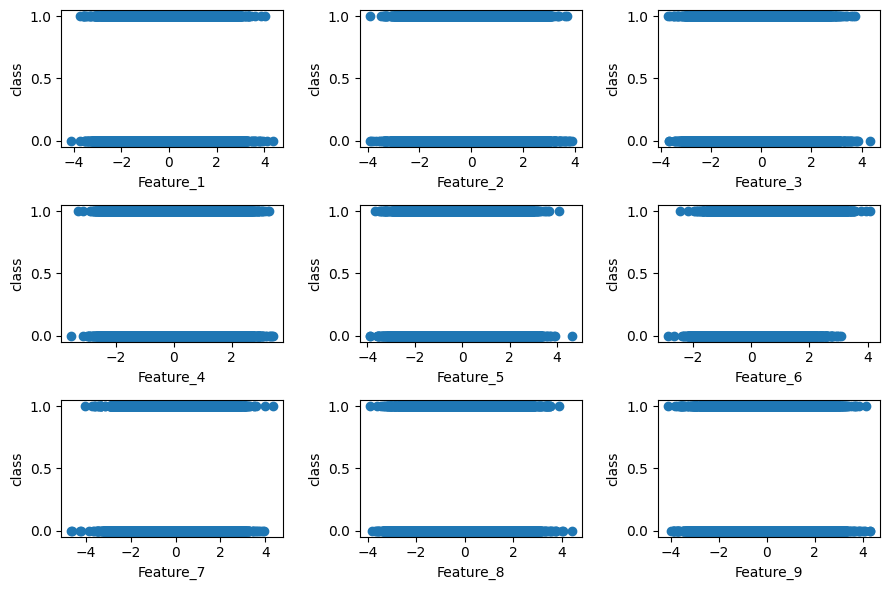

In [ ]:
#cols=data.columns
xlab = data2.drop(columns='Class')

fig,axs=plt.subplots(3,3,figsize=(9,6))
axs=axs.flatten()
m,n=x.shape
for i in range(9):
    axs[i].scatter(x[:,i],y)
    axs[i].set_xlabel(xlab.columns[i])
    axs[i].set_ylabel('class')
plt.tight_layout()
plt.show()

In [ ]:
#glucose >bmi>    age > pregnancies > pedigree
w=np.random.randn(x.shape[1])
b=0

In [ ]:
w.shape

(20,)

In [ ]:
def stable_sigmoid(z):
    z = np.clip(z, -500, 500)  # Clip to prevent extreme values
    return np.where(
        z >= 0,
        1 / (1 + np.exp(-z)),  # Standard sigmoid formula for z >= 0
        np.exp(z) / (1 + np.exp(z))  # Stable sigmoid formula for z < 0
    )

def sigmoid(x, w, b):
    z = np.dot(x, w) + b
    return stable_sigmoid(z)

In [ ]:
def predict(x, y, w, b):
    f = sigmoid(x, w, b)
    predictions = (f >= 0.5).astype(int)  # Convert probabilities to binary labels
    return predictions                              # (True or False), which is then converted to integers (1 or 0) using .astype(int).

In [ ]:
print(predict(x[2], y,w, b))

0


In [ ]:
def comcost(x, y, w, b):
    """Compute the cross-entropy cost."""
    p = 1e-6  # Add a small epsilon for numerical stability
    f = sigmoid(x, w, b)
    err = np.mean(-y * np.log(f + p) - (1 - y) * np.log(1 - f + p))
    return err

In [ ]:
err=comcost(x,y,w,b)
print(err)

1.3266636522573239


In [ ]:
def derivatives(x, y, w, b):
    m = x.shape[0]

    z = np.dot(x, w) + b
    f = stable_sigmoid(z)

    # Compute errors for the cost function
    p = 1e-6  #  small constant for numerical stability in log
    err = -y * np.log(f + p) - (1 - y) * np.log(1 - f + p)

    # Gradients
    dj_dw = np.dot(x.T, (f - y)) / m  # Gradient with respect to weights
    dj_db = np.sum(f - y) / m         # Gradient with respect to bias

    return dj_dw, dj_db

In [ ]:
dj_dw,dj_db=derivatives(x,y,w,b)
print(dj_dw)
print(dj_db)

[ 2.69909194e-02  6.13698344e-02 -1.19552889e-02 -2.61038959e-02
 -4.57301746e-02 -2.79688020e-01  1.32766939e-01 -1.13838579e-01
 -6.34534120e-02  1.54412256e-04  8.99512620e-02  9.68339675e-02
  1.46871312e-02 -1.10337980e-01 -7.13840985e-02  6.79776148e-02
 -2.01660992e-01 -1.65394523e-02 -7.95425080e-02 -5.86404010e-02]
0.17382479593251562


In [ ]:
def gradient_descent(x,y,w,b,alpha,numit,comcost, derivatives):
    j_hist=[]
    p_hist=[]
    btemp=b
    wtemp=w
    for i in range(numit):
        dj_dw,dj_db=derivatives(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        if i<1000:
            j_hist.append(comcost(x,y,w,b))
            p_hist.append([w,b])
    return w,b,j_hist,p_hist

In [ ]:
wf,bf,j_hist,p_hist=gradient_descent(x[:48000,:],y[:48000],w,b,0.01,1000,comcost,derivatives)
print(f"final w:{wf}and{bf}")

final w:[ 0.18085184  0.2630549  -0.03541455 -1.09856965 -0.1846256   0.85475995
  0.66348178 -0.54772598  0.10525762  0.03418429  0.39591864  0.42638768
  0.04811421 -0.15281774  0.3836332  -0.2279768   1.54598665 -0.67258255
 -1.36510659 -0.28203156]and-0.919291967354467


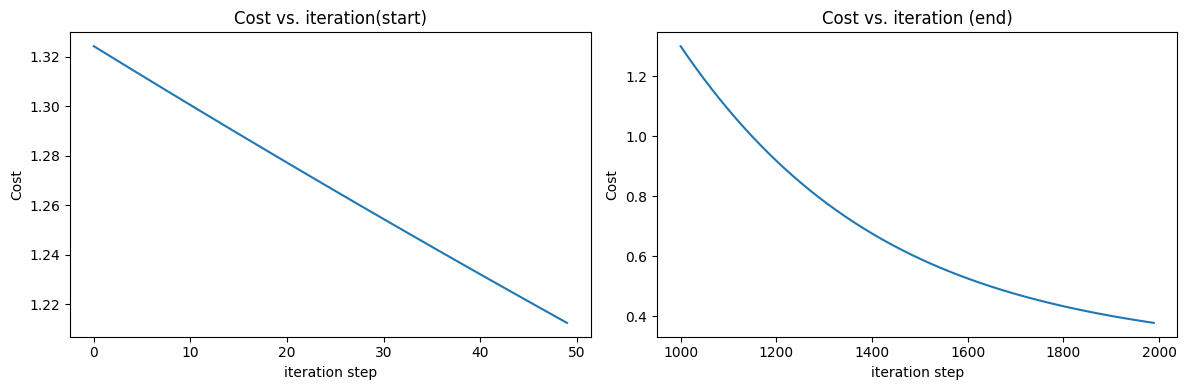

In [ ]:
# plot cost versus iteration
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.plot(j_hist[:50])
ax2.plot(1000 + np.arange(len(j_hist[10:])), j_hist[10:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.tight_layout()
plt.show()

In [ ]:
x_new=x[50,:]
x_new_normalized = (x_new - mean) / sd
print(x_new_normalized)
print(f"predicted class status:{predict(x[4,:],y,wf,bf)}")

[ 7.0490968   1.91440006 -2.34733039  0.46784052 -3.29979396 -0.60141713
  1.0106006   3.86759088  2.4023229  -0.60458275  0.13561315  1.32221568
 -1.86562392  0.55123561 -0.93786734  0.46611123  0.78862632 -1.59637055
  1.72156896 18.50341488]
predicted class status:0


In [ ]:
y_pred=predict(x[:48000,:],y[:48000],wf,bf)

In [ ]:
def calculate_f1_score(y_true, y_pred):

    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    # True Positives (TP): Predicted 1 and Actual 1
    tp = np.sum((y_pred == 1) & (y_true == 1))

    # False Positives (FP): Predicted 1 and Actual 0
    fp = np.sum((y_pred == 1) & (y_true == 0))

    # False Negatives (FN): Predicted 0 and Actual 1
    fn = np.sum((y_pred == 0) & (y_true == 1))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score,precision,recall

In [ ]:
np.unique(y_pred)
np.unique(y[:48000])
num_ones = np.sum(y[:48000] == 1)
num_zeros = np.sum(y[:48000] == 0)

print(f"Number of 1s: {num_ones}")
print(f"Number of 0s: {num_zeros}")

Number of 1s: 15284
Number of 0s: 32716


In [ ]:
f1_score,p,r = calculate_f1_score(y[:48000], y_pred)
print(f"F1 Score: {f1_score},{p},{r}")

F1 Score: 0.7823009998701467,0.7763530927835052,0.7883407484951583
